In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import matplotlib.pyplot as plt
import numpy as np

cred = credentials.Certificate("nonogram-48dd4-firebase-adminsdk-glxux-6872f3bf40.json")
firebase_admin.initialize_app(cred)

In [2]:
added = ['Star']

In [3]:
db = firestore.client()


levels_ref = db.collection("levels")
docs = levels_ref.stream()
grids = {}
for doc in docs:
    if doc.to_dict()["name"] in added:
        continue
    print("GameLevel(\nnumber:")
    for key, value in doc.to_dict().items():
        if key == "goal":
            grids.update({doc.to_dict()["name"]: value})
        if key == "name":
            print(f"    puzzleName: '{value}',")
        else:
            print(f"{key}: {value},")
    print(")")

GameLevel(
number:
height: 10,
width: 10,
columnIndications: [[4],[7],[8],[8],[8],[8],[8],[8],[7],[4]],
goal: [[0,1,1,0,0,0,0,1,1,0],[1,1,1,1,0,0,1,1,1,1],[1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1],[0,1,1,1,1,1,1,1,1,0],[0,1,1,1,1,1,1,1,1,0],[0,0,1,1,1,1,1,1,0,0],[0,0,0,1,1,1,1,0,0,0],[0,0,0,0,1,1,0,0,0,0]],
rowIndications: [[2,2],[4,4],[10],[10],[10],[8],[8],[6],[4],[2]],
    puzzleName: 'Heart',
)
GameLevel(
number:
height: 15,
width: 15,
columnIndications: [[4],[6],[6,3],[12],[12],[10],[11],[11],[11],[10],[12],[12],[6,3],[6],[4]],
goal: [[0,1,1,1,0,0,0,0,0,0,0,1,1,1,0],[1,1,1,1,1,0,0,0,0,0,1,1,1,1,1],[1,1,1,1,1,0,0,0,0,0,1,1,1,1,1],[1,1,1,1,1,0,0,0,0,0,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],[0,0,0,1,1,1,1,1,1,1,1,1,0,0,0],[0,0,0,1,1,1,1,1,1,1,1,1,0,0,0],[0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],[0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],[0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],[0,0,0,1,1,1,1,1,1,1,1,1,0,0,0],[0,0,0,0,1,1,1,1,1,1,1,0,0,0,0],[0,0,0,0,0,1,1

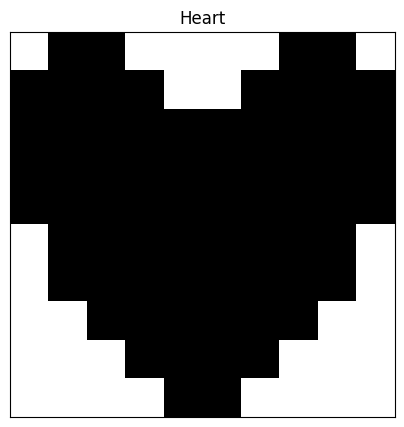

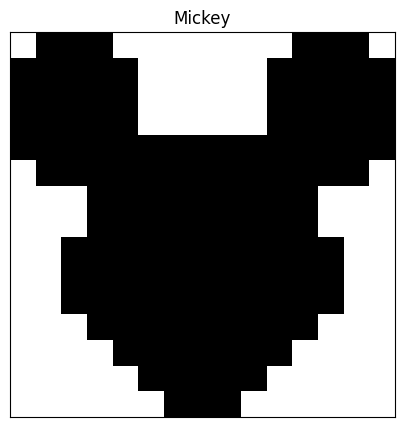

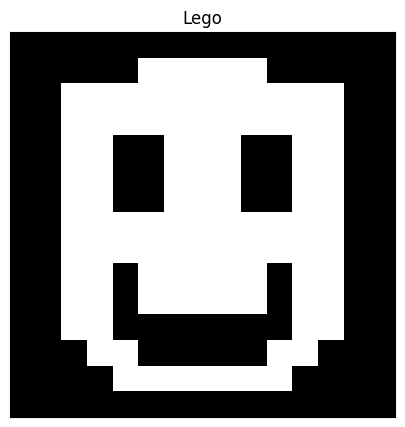

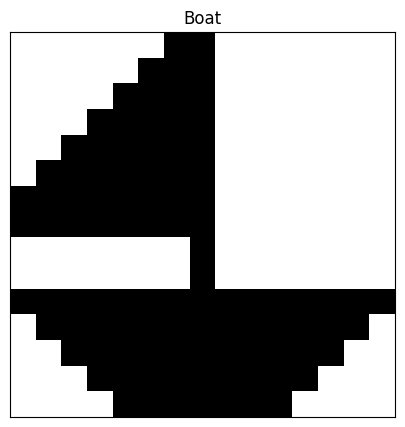

In [4]:
import ast

for title, puzzle_string in grids.items():
    puzzle = ast.literal_eval(puzzle_string)

    puzzle_array = np.array(puzzle)

    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(puzzle_array, cmap="Greys", aspect="equal")
    plt.xticks([])
    plt.yticks([])

    plt.show()